<a href="https://colab.research.google.com/github/Rojan116/AI_works/blob/master/MLP_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries
import torch
import numpy as np

In [3]:
#load data
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

0it [00:00, ?it/s]

9920512it [00:00, 10486005.22it/s]                           


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


32768it [00:00, 164971.35it/s]           


  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


1654784it [00:00, 2678558.41it/s]                           
8192it [00:00, 62728.64it/s]            


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw
Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


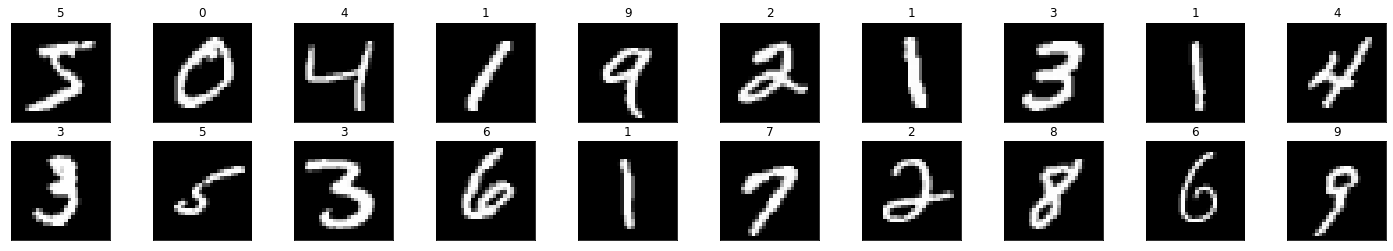

In [4]:
#Visualize data
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

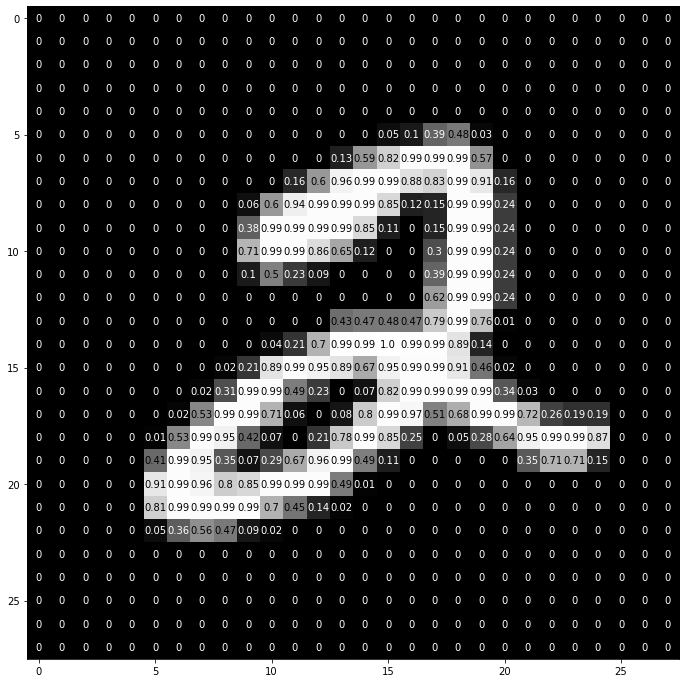

In [5]:
#View Image in more details
img = np.squeeze(images[5])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [6]:
#Define Neural Network Architecture
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.hiddenLayer_1=512
        self.hiddenLayer_2=512
        self.fc1 = nn.Linear(28 * 28, self.hiddenLayer_1)
        self.fc2 = nn.Linear(self.hiddenLayer_1,self.hiddenLayer_2)
        self.fc3=nn.Linear(self.hiddenLayer_2,10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        #add dropout layer
        x=self.dropout(x)
        #add hiddenlayer with relu activation
        x=F.relu(self.fc2(x))
        #add dropout
        x=self.dropout(x)
        #add output layer
        x=self.fc3(x)
        return x


#init NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [0]:
#init loss
criterion = nn.CrossEntropyLoss()
#init optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

#Training Model

In [8]:
#number of Epochs 
n_epochs = 30

#prepare model for train
model.train()

for epoch in range(n_epochs):
  #training loss
  train_loss=0.0
  for data, target in train_loader:
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # perform a single optimization step (parameter update)
    optimizer.step()
    # update running training loss
    train_loss += loss.item()*data.size(0)
             
  # print training statistics 
  # calculate average loss over an epoch
  train_loss = train_loss/len(train_loader.sampler)

  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
      epoch+1, 
      train_loss
      ))

Epoch: 1 	Training Loss: 0.846323
Epoch: 2 	Training Loss: 0.333702
Epoch: 3 	Training Loss: 0.257502
Epoch: 4 	Training Loss: 0.210978
Epoch: 5 	Training Loss: 0.180053
Epoch: 6 	Training Loss: 0.154259
Epoch: 7 	Training Loss: 0.136445
Epoch: 8 	Training Loss: 0.123832
Epoch: 9 	Training Loss: 0.112233
Epoch: 10 	Training Loss: 0.101993
Epoch: 11 	Training Loss: 0.095638
Epoch: 12 	Training Loss: 0.085941
Epoch: 13 	Training Loss: 0.080798
Epoch: 14 	Training Loss: 0.076038
Epoch: 15 	Training Loss: 0.070610
Epoch: 16 	Training Loss: 0.065947
Epoch: 17 	Training Loss: 0.061009
Epoch: 18 	Training Loss: 0.059028
Epoch: 19 	Training Loss: 0.056148
Epoch: 20 	Training Loss: 0.051587
Epoch: 21 	Training Loss: 0.049843
Epoch: 22 	Training Loss: 0.047132
Epoch: 23 	Training Loss: 0.043579
Epoch: 24 	Training Loss: 0.042979
Epoch: 25 	Training Loss: 0.040700
Epoch: 26 	Training Loss: 0.037939
Epoch: 27 	Training Loss: 0.037077
Epoch: 28 	Training Loss: 0.035344
Epoch: 29 	Training Loss: 0.0

#Test NN

In [9]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.053615

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 99% (1128/1135)
Test Accuracy of     2: 98% (1015/1032)
Test Accuracy of     3: 98% (991/1010)
Test Accuracy of     4: 98% (967/982)
Test Accuracy of     5: 98% (877/892)
Test Accuracy of     6: 98% (939/958)
Test Accuracy of     7: 97% (1005/1028)
Test Accuracy of     8: 97% (950/974)
Test Accuracy of     9: 97% (987/1009)

Test Accuracy (Overall): 98% (9831/10000)


#Visualize Sample Test Results

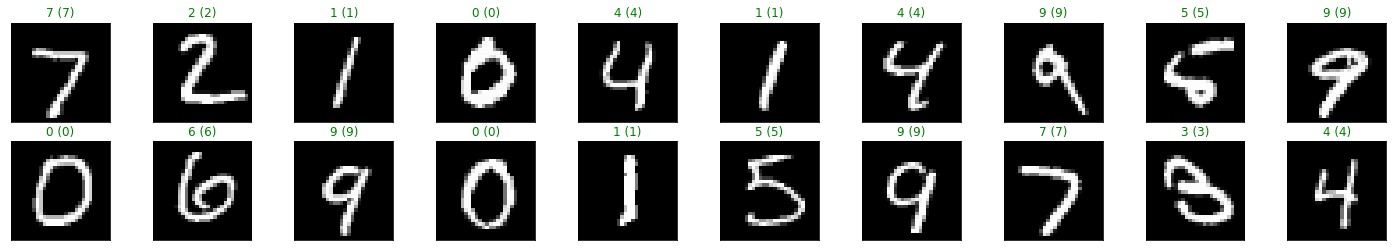

In [10]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))